In [1]:
%matplotlib inline
%load_ext rpy2.ipython
# Loading matplot Python library
# Loading the Rmagic extension

In [5]:
%%R
#source('http://bioconductor.org/biocLite.R')
#biocLite('phyloseq')
library(phyloseq)
library(ggplot2)
library(dplyr)
library(Rmisc)
setwd("~/Dropbox/clado-manuscript/Mikes_MS_Data/")

/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: plyr

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: ------------------

In [7]:
%%R
# Load biom file and add metadata. 
biom <- import_biom("OTU_table.biom", "~/Dropbox/clado-manuscript/Nephele/PipelineResults_NMEPINZ20QK1/nephele_outputs/tree.tre", parseFunction=parse_taxonomy_greengenes)
sam.data <- read.csv(file="sample.data.csv", row.names=1, header=TRUE)
head(sam.data)
sam.data$Date <- as.factor(sam.data$Date)
sam.data$DateSite <- paste(sam.data$Date, sam.data$Site)
head(sam.data); str(sam.data)
sample_data(biom) <- sam.data
biom; sample_data(biom)
head(otu_table(biom))

'data.frame':	52 obs. of  6 variables:
 $ TreatmentGroup: Factor w/ 2 levels "Early","Late": 1 1 1 1 1 1 1 1 1 1 ...
 $ Site          : Factor w/ 3 levels "North","Point",..: 1 1 1 2 2 2 3 3 3 1 ...
 $ Date          : Factor w/ 6 levels "172","178","185",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ Description   : Factor w/ 52 levels "Sample of day 172 at site North 1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ SampleID.1    : Factor w/ 52 levels "C172N1","C172N2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ DateSite      : chr  "172 North" "172 North" "172 North" "172 Point" ...
OTU Table:          [6 taxa and 52 samples]
                     taxa are rows
                               C178N1 C178P1 C185P2 C206N2 C206P1 C206P2 C214P1
New.CleanUp.ReferenceOTU155901      0      0      0      0      0      1      0
New.CleanUp.ReferenceOTU321320      0      0      0      0      0      0      0
KC551585.1.1451                     2      0      0      6      0      4      9
JQ945994.1.1399                     0      0      0 

Run 0 stress 0.1164511 
Run 1 stress 0.1164499 
... New best solution
... Procrustes: rmse 0.0002640943  max resid 0.001356323 
... Similar to previous best
Run 2 stress 0.1164511 
... Procrustes: rmse 0.0002640221  max resid 0.001358079 
... Similar to previous best
Run 3 stress 0.1164511 
... Procrustes: rmse 0.0002641561  max resid 0.001355037 
... Similar to previous best
Run 4 stress 0.1164499 
... New best solution
... Procrustes: rmse 2.17749e-06  max resid 8.478533e-06 
... Similar to previous best
Run 5 stress 0.1164511 
... Procrustes: rmse 0.0002640616  max resid 0.001356605 
... Similar to previous best
Run 6 stress 0.2685042 
Run 7 stress 0.2817777 
Run 8 stress 0.1164511 
... Procrustes: rmse 0.0002642325  max resid 0.001356391 
... Similar to previous best
Run 9 stress 0.1164499 
... New best solution
... Procrustes: rmse 1.148161e-06  max resid 2.983063e-06 
... Similar to previous best
Run 10 stress 0.1164499 
... Procrustes: rmse 1.144766e-06  max resid 3.713584e-06 


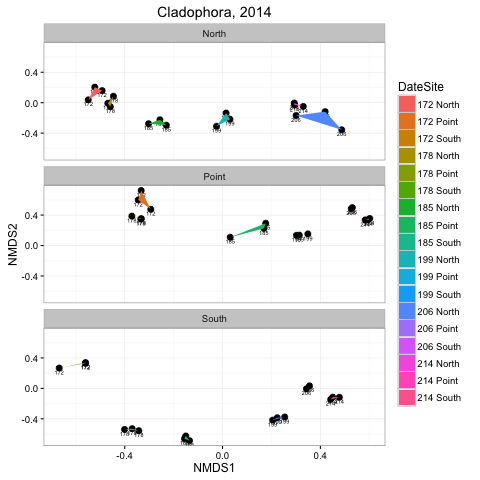

In [10]:
%%R
# Custom plotting. 
nolegend <- theme(legend.position="none")
readabund <- labs(y="read abundance")
# Normalize by relative abundance. 
biom.relabund <- transform_sample_counts(biom, function(x) x / sum(x))
ordNMDS <- ordinate(biom.relabund, method="NMDS", distance="bray")
ordNMDS.k3 <- ordinate(biom.relabund, method="NMDS", distance="bray", k=3)
ord.k3 <- plot_ordination(biom.relabund, ordNMDS.k3, shape="Site", color = "DateSite") + geom_point(size=2) + geom_polygon(aes(fill=DateSite), alpha=0.7) + labs(title = "Cladophora, 2014") + theme_bw()
ord.k3
# Facet by Date. 
ord.k3.facet1 <- plot_ordination(biom.relabund, ordNMDS.k3, shape="Site", label = "Date") + geom_point(size=2.5) + facet_wrap(~Date) + labs(title = "Cladophora, 2014") + geom_polygon(aes(fill=DateSite)) + theme_bw()
ord.k3.facet1
# Facet by Site. 
ord.k3.facet2 <- plot_ordination(biom.relabund, ordNMDS.k3, label = "Date") + geom_point(size=2.5) + facet_wrap(~Site, ncol = 1) + labs(title = "Cladophora, 2014") + geom_polygon(aes(fill=DateSite)) + theme_bw()
ord.k3.facet2

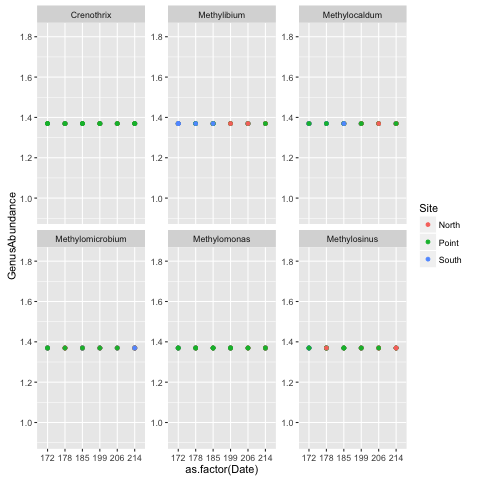

In [16]:
%%R
# Find methanotrophs
methanolist <- read.table(file = "/Users/michaeljbraus/Dropbox/clado-manuscript/clado_16S-archive/methanos.txt")
methanolist <- as.vector(methanolist$V1)
# 
biom.relabund.methanos <- subset_taxa(biom.relabund, Genus %in% as.factor(methanolist))
biom.relabund.methanos
head(tax_table(biom.relabund.methanos))
# 
relabund.methanos <- psmelt(biom.relabund.methanos)
relabund.methanos.genus <- relabund.methanos%>%
  group_by(Sample, Genus)%>%
  mutate(GenusAbundance = sum(Abundance))%>%
  distinct(Sample, GenusAbundance, TreatmentGroup, Site, Date, Family, Genus)
head(relabund.methanos.genus)
# 
p <- ggplot(relabund.methanos.genus, aes(as.factor(Date), GenusAbundance, color = Site))
p <- p + geom_point() + facet_wrap(~Genus, scales="free_y")
p

In [14]:
%%R
# Means with error bars
# stats <- summarySE(biom, measurevar="Abundance", groupvars=c("bacsp","media")); stats
# p.stats <- ggplot(stats, aes(x = media, y = percloss, fill = bacsp))
# p.stats + geom_bar(stat = "identity", position=position_dodge(.9)) + geom_errorbar(aes(ymin=percloss-se, ymax=percloss+se), width=.2, colour="darkblue", position=position_dodge(.9)) + geom_rug()  + scale_fill_grey()

NULL


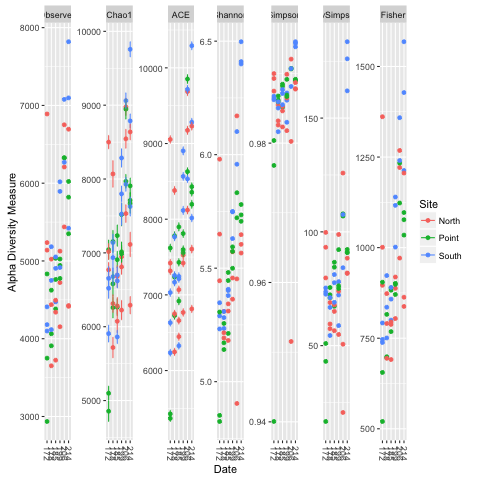

In [12]:
%%R
# Plot richness. 
biom.rich <- plot_richness(biom, x="Date", color="Site")
biom.rich

In [ ]:
%%R
# Stacked bar plots of methanotrophs. 
barstack.methanos <- plot_bar(biom.relabund.methanos, x = "Date", fill="Site") + facet_wrap(~Genus, scales="free_y")
barstack.methanos